In [ ]:
%pip install torch
%pip install tensorflow
%pip install torchvision
%pip install PIL

# Basic Setup

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
LEARNING_RATE = 0.01
BATCH_SIZE = 4
EPOCHS = 20
DEVICE = 'cpu'
ROOT_DIR_BLUR = '/Users/gauravrampuria/Desktop/Style Swap/archive (1)/defocused_blurred/'
ROOT_DIR_SHARP = '/Users/gauravrampuria/Desktop/Style Swap/archive (1)/sharp/'

Displaying files in the blurred dataset

In [3]:
sorted(os.listdir(ROOT_DIR_BLUR))

['0_IPHONE-SE_F.JPG',
 '100_NIKON-D3400-35MM_F.JPG',
 '101_NIKON-D3400-35MM_F.JPG',
 '102_NIKON-D3400-35MM_F.JPG',
 '103_HUAWEI-P20_F.jpg',
 '104_IPHONE-SE_F.jpg',
 '105_IPHONE-SE_F.jpg',
 '106_NIKON-D3400-35MM_F.JPG',
 '107_XIAOMI-MI8-SE_F.jpg',
 '108_XIAOMI-MI8-SE_F.jpg',
 '109_HONOR-7X_F.jpg',
 '10_ASUS-ZENFONE-LIVE-ZB501KL_F.jpg',
 '110_IPHONE-7_F.jpeg',
 '111_IPHONE-7_F.jpeg',
 '112_NIKON-D3400-35MM_F.JPG',
 '113_SAMSUNG-GALAXY-A5_F.jpg',
 '114_ASUS-ZE500KL_F.jpg',
 '115_NIKON-D3400-35MM_F.JPG',
 '116_BQ-5512L_F.jpg',
 '117_HONOR-7X_F.jpg',
 '118_HONOR-7X_F.jpg',
 '119_HONOR-7X_F.jpg',
 '11_XIAOMI-MI8-SE_F.jpg',
 '120_HONOR-7X_F.jpg',
 '121_HONOR-7X_F.jpg',
 '122_HONOR-7X_F.jpg',
 '123_NIKON-D3400-35MM_F.JPG',
 '124_HONOR-7X_F.jpg',
 '125_NIKON-D3400-35MM_F.JPG',
 '126_NIKON-D3400-18-55MM_F.JPG',
 '127_IPHONE-8_F.jpeg',
 '128_XIAOMI-MI8-SE_F.jpg',
 '129_NIKON-D3400-18-55MM_F.JPG',
 '12_SAMSUNG-GALAXY-J5_F.jpg',
 '130_NIKON-D3400-18-55MM_F.JPG',
 '131_NIKON-D3400-18-55MM_F.JPG',
 '

Displaying files in the sharp dataset

In [4]:
sorted(os.listdir(ROOT_DIR_SHARP))

['0_IPHONE-SE_S.JPG',
 '100_NIKON-D3400-35MM_S.JPG',
 '101_NIKON-D3400-35MM_S.JPG',
 '102_NIKON-D3400-35MM_S.JPG',
 '103_HUAWEI-P20_S.jpg',
 '104_IPHONE-SE_S.jpg',
 '105_IPHONE-SE_S.jpg',
 '106_NIKON-D3400-35MM_S.JPG',
 '107_XIAOMI-MI8-SE_S.jpg',
 '108_XIAOMI-MI8-SE_S.jpg',
 '109_HONOR-7X_S.jpg',
 '10_ASUS-ZENFONE-LIVE-ZB501KL_S.jpg',
 '110_IPHONE-7_S.jpeg',
 '111_IPHONE-7_S.jpeg',
 '112_NIKON-D3400-35MM_S.JPG',
 '113_SAMSUNG-GALAXY-A5_S.jpg',
 '114_ASUS-ZE500KL_S.jpg',
 '115_NIKON-D3400-35MM_S.JPG',
 '116_BQ-5512L_S.jpg',
 '117_HONOR-7X_S.jpg',
 '118_HONOR-7X_S.jpg',
 '119_HONOR-7X_S.jpg',
 '11_XIAOMI-MI8-SE_S.jpg',
 '120_HONOR-7X_S.jpg',
 '121_HONOR-7X_S.jpg',
 '122_HONOR-7X_S.jpg',
 '123_NIKON-D3400-35MM_S.JPG',
 '124_HONOR-7X_S.jpg',
 '125_NIKON-D3400-35MM_S.JPG',
 '126_NIKON-D3400-18-55MM_S.JPG',
 '127_IPHONE-8_S.jpeg',
 '128_XIAOMI-MI8-SE_S.jpg',
 '129_NIKON-D3400-18-55MM_S.JPG',
 '12_SAMSUNG-GALAXY-J5_S.jpg',
 '130_NIKON-D3400-18-55MM_S.JPG',
 '131_NIKON-D3400-18-55MM_S.JPG',
 '

# Creating the dataset class

In [5]:
class UNETDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.images = sorted(list(self.root_dir + file_name for file_name in os.listdir(self.root_dir)))
        self.transform = transforms.Compose([
            transforms.Resize((512, 512)),
            transforms.ToTensor()])

    def __len__(self):  # Returns the number of images in the dataset
        return len(self.images)

    def __getitem__(self, index):
        # Returns the specific image at that index and label corresponding to that image
        img = Image.open(self.images[index]).convert("RGB") # Reading the image
        img = self.transform(img)   # Transforming the image
        return img

Creating individual datasets

In [6]:
blurred_dataset = UNETDataset(root_dir=ROOT_DIR_BLUR)
sharp_dataset = UNETDataset(root_dir=ROOT_DIR_SHARP)
val = int(0.1 * blurred_dataset.__len__())
test = int(0.2 * blurred_dataset.__len__())
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(blurred_dataset, [blurred_dataset.__len__() - val - test, val, test])

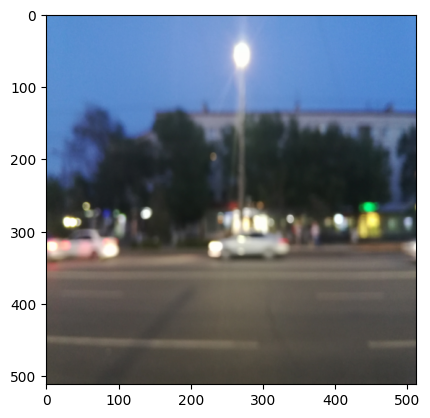

In [7]:
plt.imshow(train_dataset.__getitem__(0).numpy().transpose((1, 2, 0)))

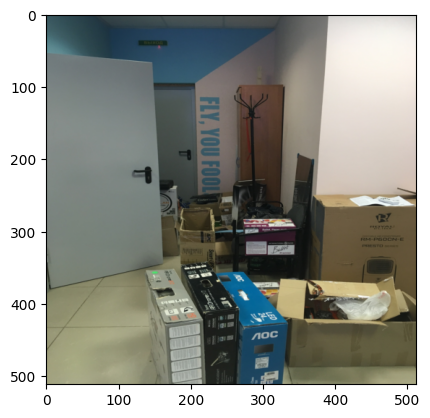

In [8]:
plt.imshow(sharp_dataset.__getitem__(0).numpy().transpose((1, 2, 0)))

In [9]:
print("No. of images in dataset: ", blurred_dataset.__len__())
train_dataset.__len__(), val_dataset.__len__(), test_dataset.__len__()

No. of images in dataset:  350


(245, 35, 70)

Looping through the dataset

In [10]:
for i, image in enumerate(train_dataset):
    print(i, image.size())
    if(i == 10):
        break

0 torch.Size([3, 512, 512])
1 torch.Size([3, 512, 512])
2 torch.Size([3, 512, 512])
3 torch.Size([3, 512, 512])
4 torch.Size([3, 512, 512])
5 torch.Size([3, 512, 512])
6 torch.Size([3, 512, 512])
7 torch.Size([3, 512, 512])
8 torch.Size([3, 512, 512])
9 torch.Size([3, 512, 512])
10 torch.Size([3, 512, 512])


However, we are losing a lot of features by using a simple for loop to iterate over the data. In particular, we are missing out on:

1. Batching the data
2. Shuffling the data
3. Load the data in parallel using multiprocessing workers.

Hence, we create a data loader to implement the above.

# Creating dataloaders

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                        shuffle=False, num_workers=0)

sharp_dataloader = DataLoader(sharp_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Showing images in batches

torch.Size([4, 3, 512, 512])


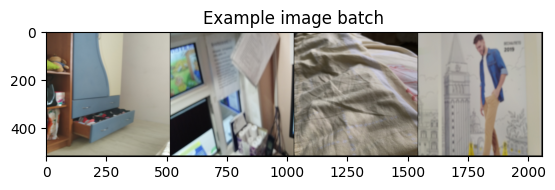

In [12]:
def show_batch(image_batch, title):
    grid = torchvision.utils.make_grid(image_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title(title)
    plt.show()


for i_batch, sample_batched in enumerate(train_dataloader):
    print(sample_batched.size())
    show_batch(sample_batched, "Example image batch")
    if i_batch == 0:
        break

# Double Convolution

In [13]:
class DoubleConv(nn.Module):
    # (Convolution -> Batch Normalization -> ReLU) * 2
    def __init__(self, in_channels, out_channels, mid_channels = 0):
        super().__init__()

        if not mid_channels:
           mid_channels = out_channels
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, stride = 1, padding = 1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, stride = 1, padding = 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.conv_layer(x)

# Downlayer (Downsampling)

In [14]:
class DownLayer(nn.Module):
    # Downsampling with Max Pool and then using double convolution
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.downLayer = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            DoubleConv(in_channels, out_channels)
        )
    
    def forward(self, x):
        return self.downLayer(x)

# Uplayer (Umsampling)

In [15]:
class UpLayer(nn.Module):
    def __init__(self, in_channels, out_channels, bilinear = True):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride = 2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, img, skip_connection):
        img = self.up(img)
        diffX = img.size()[3] - skip_connection.size()[3]
        diffY = img.size()[2] - skip_connection.size()[2]
        
        img = F.pad(img, [diffX//2, diffX - diffX // 2, diffY//2, diffY - diffY // 2])
        x = torch.cat([skip_connection, img], dim = 1)
        return self.conv(x)

# Out Convolution

In [16]:
class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    
    def forward(self,x):
        return self.conv(x)

# UNET Architecture

In [17]:
class UNET(nn.Module):
    def __init__(self, n_channels, bilinear):
        super(UNET, self).__init__()
        self.n_channels = n_channels    # n_channels = 3 ("RGB image")
        self.bilinear = bilinear

        self.conv1 = DoubleConv(n_channels, 64)
        self.down1 = DownLayer(64, 128)  # 32 -> 64 channels, 256 -> 128 size
        self.down2 = DownLayer(128, 256) # 64 -> 128 channels, 128 -> 64 size
        self.down3 = DownLayer(256, 512) # 128 -> 256 channels, 64 -> 32 size
        factor = 2 if self.bilinear else 1  # factor = 2

        self.down4 = DownLayer(512, 1024 // factor) # 128 -> 256 channels, 64 -> 32 size
        self.up1 = UpLayer(1024, 512 // factor, self.bilinear)   # 512 -> 128 channels, 128 from skip connection
        self.up2 = UpLayer(512, 256 // factor, self.bilinear)   # 512 -> 128 channels, 128 from skip connection
        self.up3 = UpLayer(256, 128 // factor, self.bilinear)   # 256 -> 64 channels, 64 from skip connection
        self.up4 = UpLayer(128, 64, bilinear)    # 128 -> 32 channels, 32 from skip connection

        self.out = OutConv(64, 3)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.out(x)
        return logits

# Creating the model

In [18]:
model = UNET(n_channels=3, bilinear=True)

## Loss function

In [19]:
loss_fn = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

## Training the model

In [24]:
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
def train_model():
    for i_batch, batch in enumerate(train_dataloader):
        image_batch = batch
        if(i_batch == 1):   # One for one batch only
                break
        maxLoss = 1000
        model_path = ''
        for i in range(EPOCHS):
            model.train(True)
            running_loss = 0
            # Zeros the gradients for every batch    
            optimizer.zero_grad()
            # Get the predictions on this batch
            output = model(image_batch)
            if i == 0:
                show_batch(image_batch, "Desired Output")
            show_batch(output, f"Epoch {i+1}")
            # Calculate the loss
            loss = loss_fn(image_batch, output)
            loss.backward()

            # Adjusting the learning rates
            optimizer.step()

            running_loss += loss.item()
            print(f"Epoch {i+1} : ", running_loss)
            if(running_loss < maxLoss):
                model_path = 'model_{}_{}'.format(timestamp, i)
                maxLoss = running_loss
        torch.save(model.state_dict(), model_path)

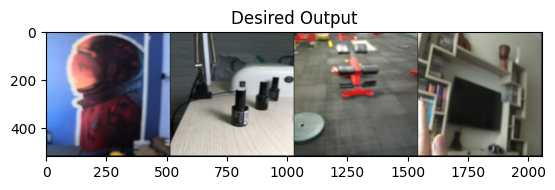

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


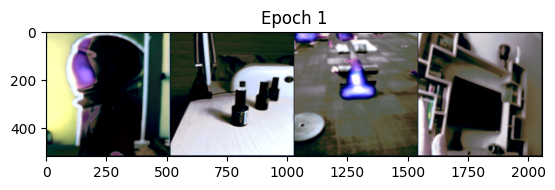

Epoch 1 :  0.036270830780267715


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


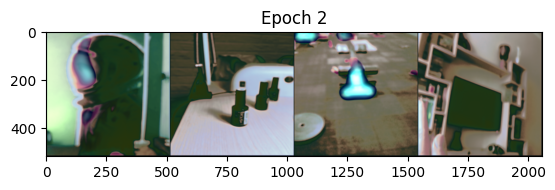

Epoch 2 :  0.018816137686371803


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


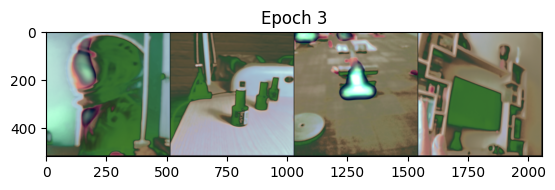

Epoch 3 :  0.02035301737487316


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


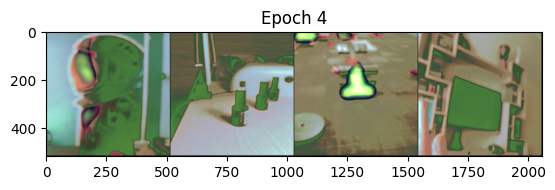

Epoch 4 :  0.02287966012954712


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


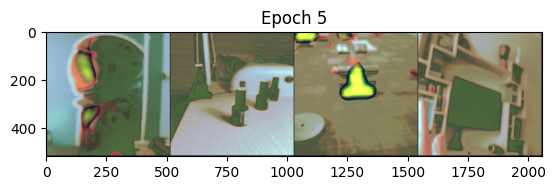

Epoch 5 :  0.020554935559630394


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


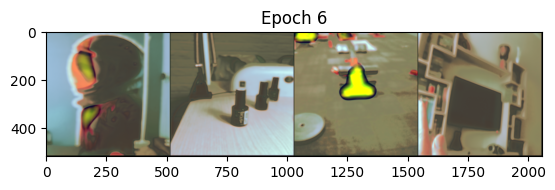

Epoch 6 :  0.016849249601364136


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


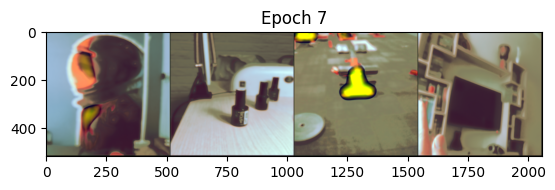

Epoch 7 :  0.013635191135108471


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


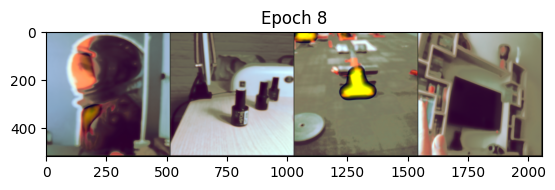

Epoch 8 :  0.011368785984814167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


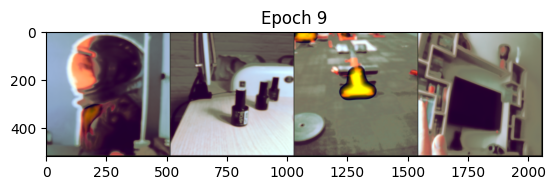

Epoch 9 :  0.00967278890311718


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


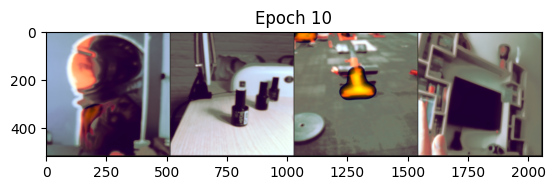

Epoch 10 :  0.008193569257855415


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


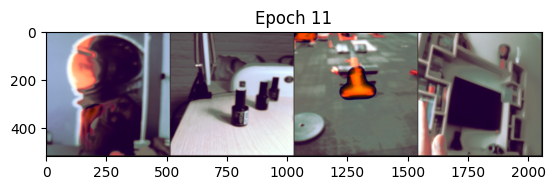

Epoch 11 :  0.006928715854883194


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


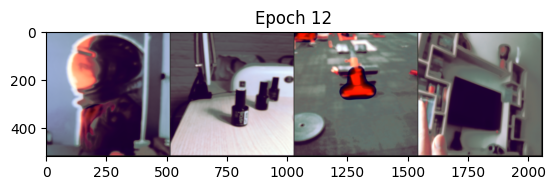

Epoch 12 :  0.005990305449813604


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


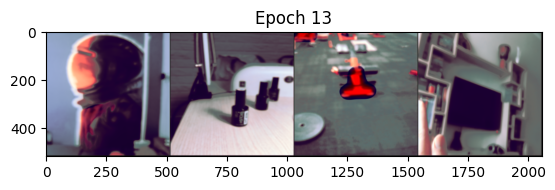

Epoch 13 :  0.005394928622990847


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


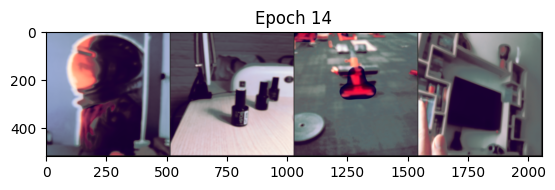

Epoch 14 :  0.004894337151199579


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


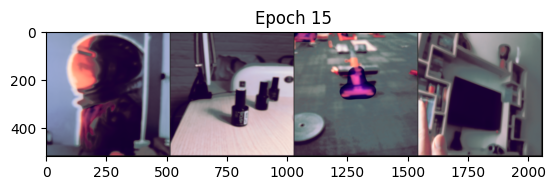

Epoch 15 :  0.00514450715854764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


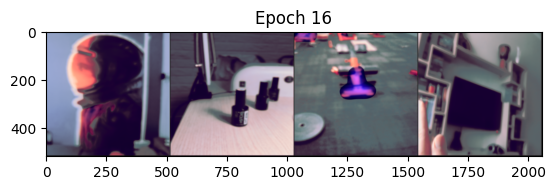

Epoch 16 :  0.00575293367728591


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


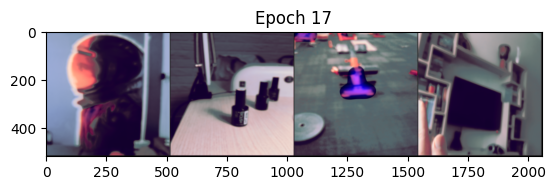

Epoch 17 :  0.0058168382383883


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


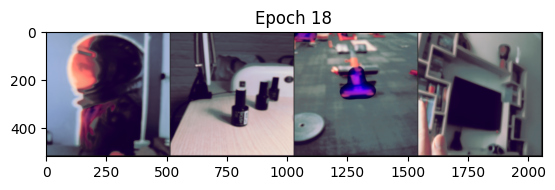

Epoch 18 :  0.005421927664428949


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


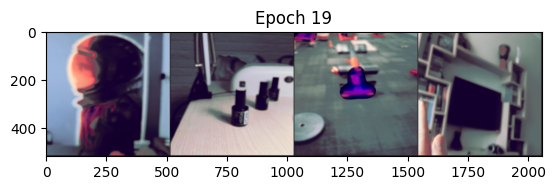

Epoch 19 :  0.0049923998303711414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


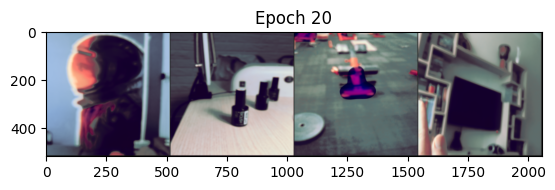

Epoch 20 :  0.004511392209678888


In [25]:
train_model()